In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
import skimage.filters as filters
import matplotlib.pyplot as plt


# read the image
img = cv2.imread('/content/drive/MyDrive/test images/401_Gridlock.jpg')

# convert to gray
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# blur
smooth = cv2.GaussianBlur(gray, (95,95), 0)

# divide gray by morphology image
division = cv2.divide(gray, smooth, scale=255)


# sharpen using unsharp masking
sharp = filters.unsharp_mask(division, radius=1.5, amount=1.5, multichannel=False, preserve_range=False)
sharp = (255*sharp).clip(0,255).astype(np.uint8)


<ipython-input-2-db9466ba0408>:21: FutureWarning: `multichannel` is a deprecated argument name for `unsharp_mask`. It will be removed in version 1.0. Please use `channel_axis` instead.
  sharp = filters.unsharp_mask(division, radius=1.5, amount=1.5, multichannel=False, preserve_range=False)


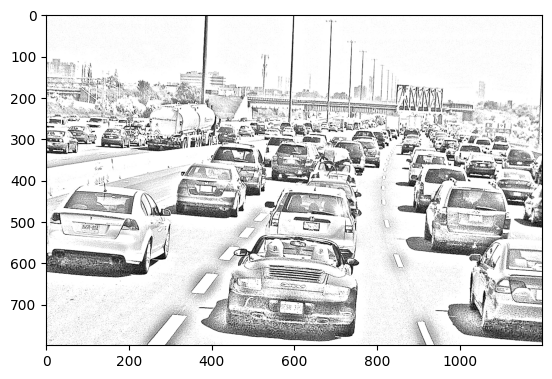

In [3]:
plt.imshow(cv2.cvtColor(sharp, cv2.COLOR_BGR2RGB))

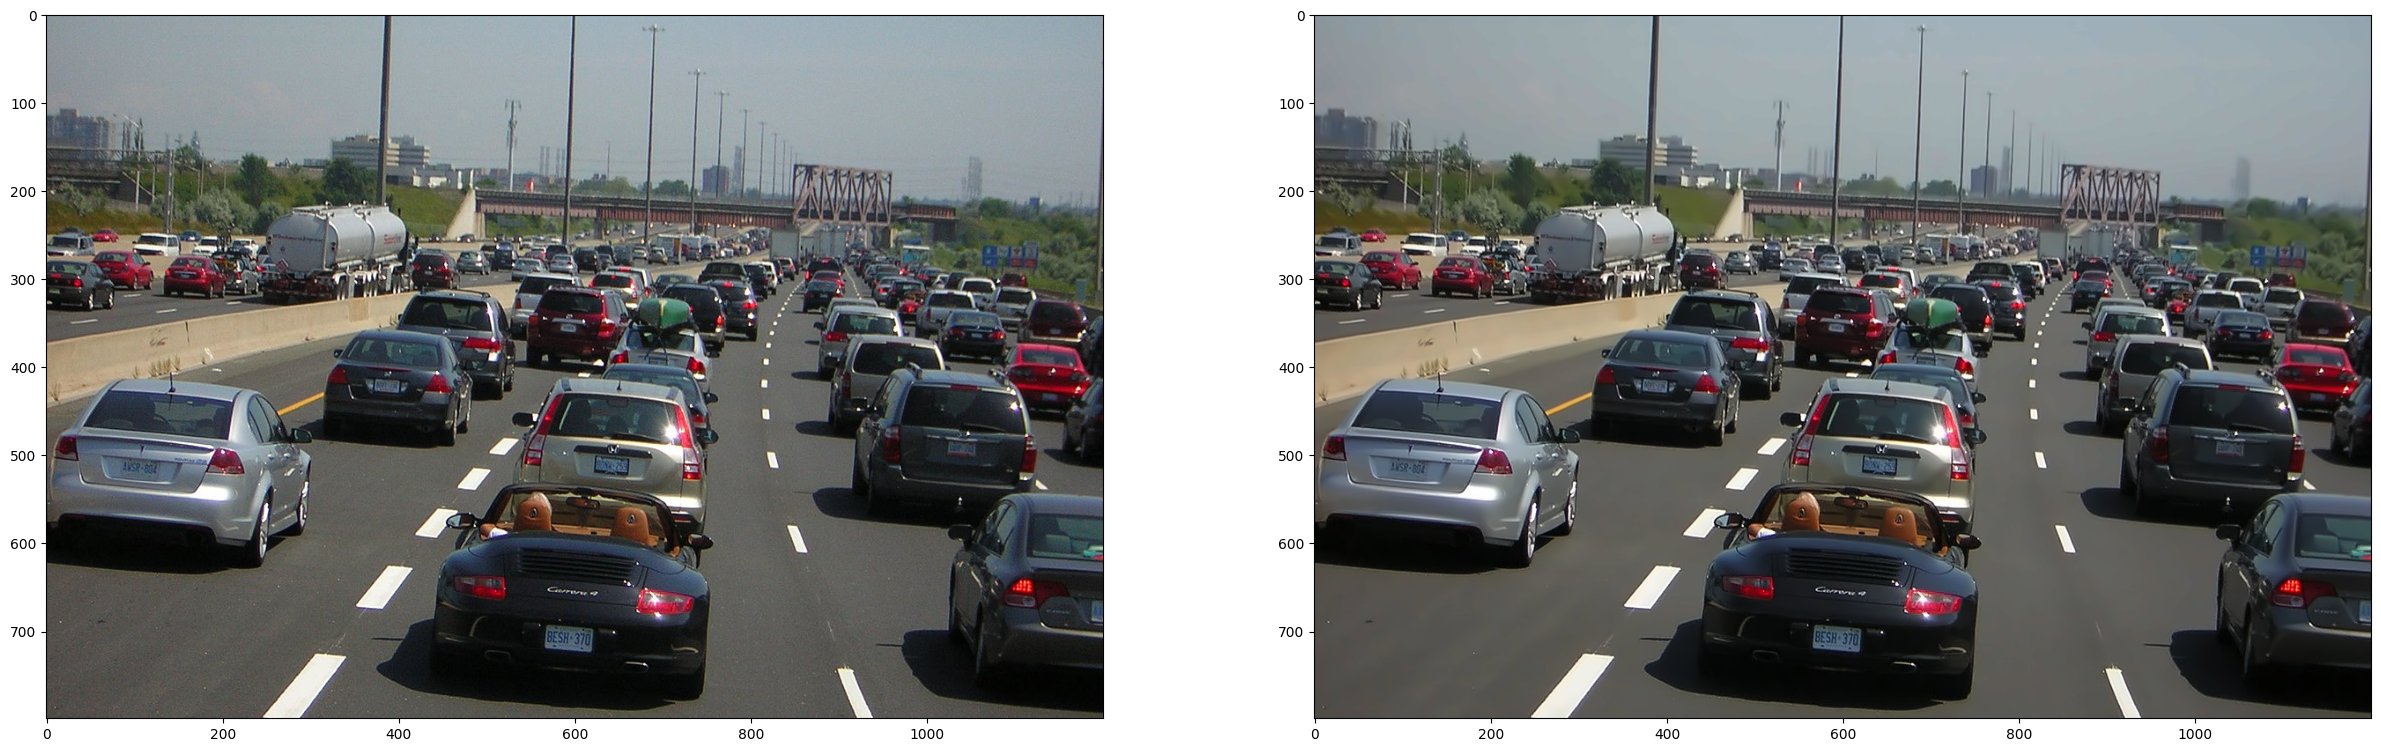

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Reading image from folder where it is stored
img = cv2.imread('/content/drive/MyDrive/test images/401_Gridlock.jpg')

# denoising of image saving it into dst image
dst = cv2.fastNlMeansDenoisingColored(img, None, 5, 5, 8, 15)

# Plotting of source and destination image
plt.figure(figsize=(30,30))

plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(122), plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))


plt.show()

In [6]:
filename = 'denoised_image.jpg'
cv2.imwrite(filename, dst)

True

In [ ]:
import shutil
source = '/content/denoised_image.jpg'
destination = '/content/drive/MyDrive'
shutil.copy(source, destination)

'/content/drive/MyDrive/denoised_image.jpg'

In [7]:
image = dst
blurred_img = cv2.GaussianBlur(image, (5, 5), 0)
mask = np.zeros(image.shape, np.uint8)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)[1]
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(mask, contours, -1, (255,255,255),5)
output = np.where(mask==np.array([255, 255, 255]), blurred_img, image)

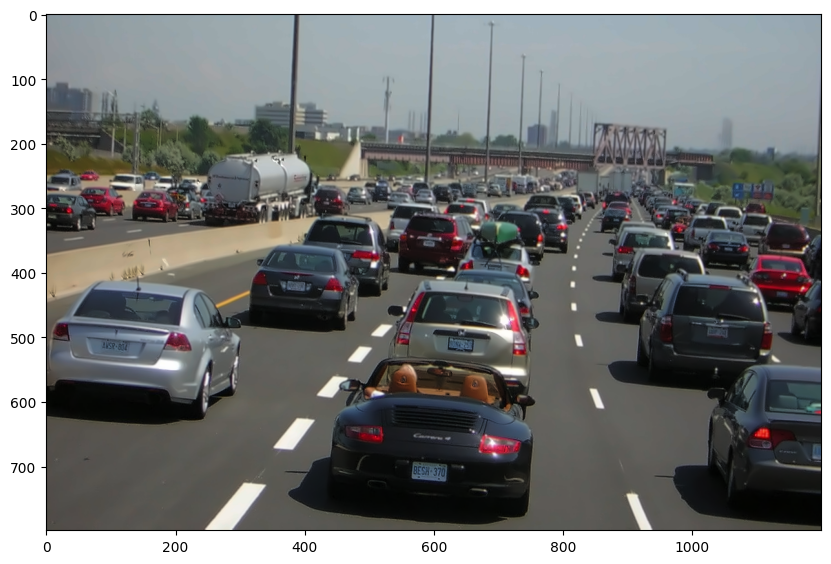

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

In [ ]:
filename = 'denoised_edgesS_image.jpg'
cv2.imwrite(filename, output)

True

In [ ]:
import shutil
source = '/content/denoised_edgesS_image.jpg'
destination = '/content/drive/MyDrive'
shutil.copy(source, destination)

'/content/drive/MyDrive/denoised_edgesS_image.jpg'

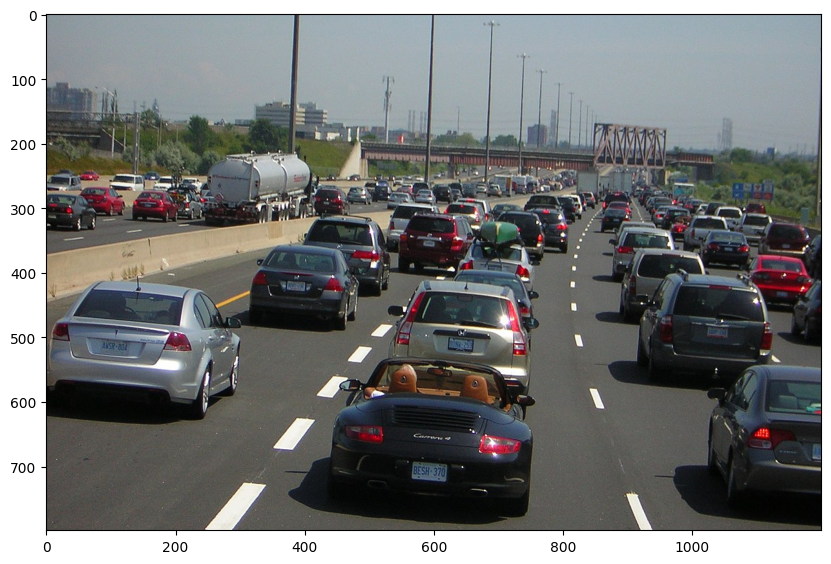

In [9]:
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
# Apply the sharpening kernel to the image using filter2D
sharpened = cv2.filter2D(dst, -1, kernel)

plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))